# Neural Networks in Keras
The examples in this notebook assume that you are familiar with the theory of the neural networks. To learn more about the neural networks, you can refer resources in the readme file.

## Import modules

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)  

## Load MNIST dataset

In [2]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

Using Theano backend.


## Show Examples from Each Class

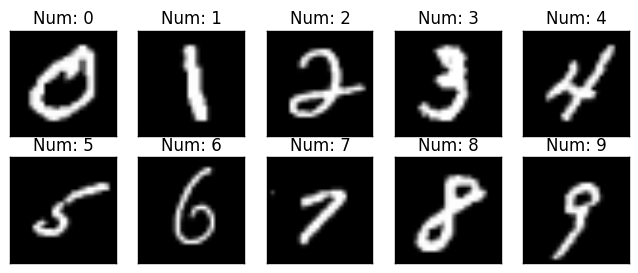

In [3]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

## Prepare Dataset

In [4]:
from keras.utils import np_utils
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Import Keras Modules

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

## Define a Neural Network Model with a single hidden layer

In [6]:
# Initialize model
model = Sequential()
# Add layers
model.add(Dense(100, input_dim = num_input_nodes),)
model.add(Activation('sigmoid'))
# To add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# define optimizer, loss function
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [7]:
# Print model information
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           78500       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1010        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_____________________

## Train the model

In [8]:
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
end = time.time()
print "Model took %0.2f seconds to train"%(end - start)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.0896 - acc: 0.2103 - val_loss: 0.0830 - val_acc: 0.3227
Epoch 2/10
1s - loss: 0.0779 - acc: 0.3908 - val_loss: 0.0732 - val_acc: 0.4453
Epoch 3/10
1s - loss: 0.0695 - acc: 0.4903 - val_loss: 0.0654 - val_acc: 0.5388
Epoch 4/10
1s - loss: 0.0625 - acc: 0.5668 - val_loss: 0.0589 - val_acc: 0.6121
Epoch 5/10
1s - loss: 0.0564 - acc: 0.6426 - val_loss: 0.0529 - val_acc: 0.6862
Epoch 6/10
1s - loss: 0.0511 - acc: 0.6976 - val_loss: 0.0479 - val_acc: 0.7260
Epoch 7/10
1s - loss: 0.0466 - acc: 0.7297 - val_loss: 0.0438 - val_acc: 0.7501
Epoch 8/10
1s - loss: 0.0431 - acc: 0.7507 - val_loss: 0.0407 - val_acc: 0.7672
Epoch 9/10
1s - loss: 0.0403 - acc: 0.7655 - val_loss: 0.0382 - val_acc: 0.7806
Epoch 10/10
1s - loss: 0.0379 - acc: 0.7779 - val_loss: 0.0361 - val_acc: 0.7885
Model took 16.11 seconds to train


## Plot Accuracy or Loss as a Function of Number of Epoch

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

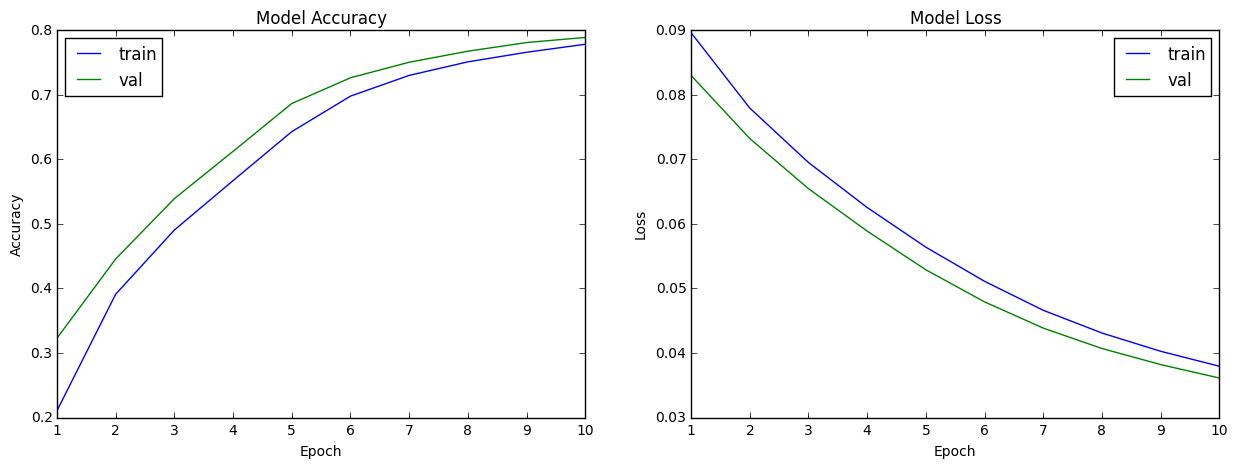

In [10]:
plot_model_history(model_info)

## Test the Model

In [11]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [12]:
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

Accuracy on test data is: 78.87


## Observation:
Both training and validation accuracy increase as the number of epochs increase. More information is learned in each epoch.

## Vary the Learning Rate

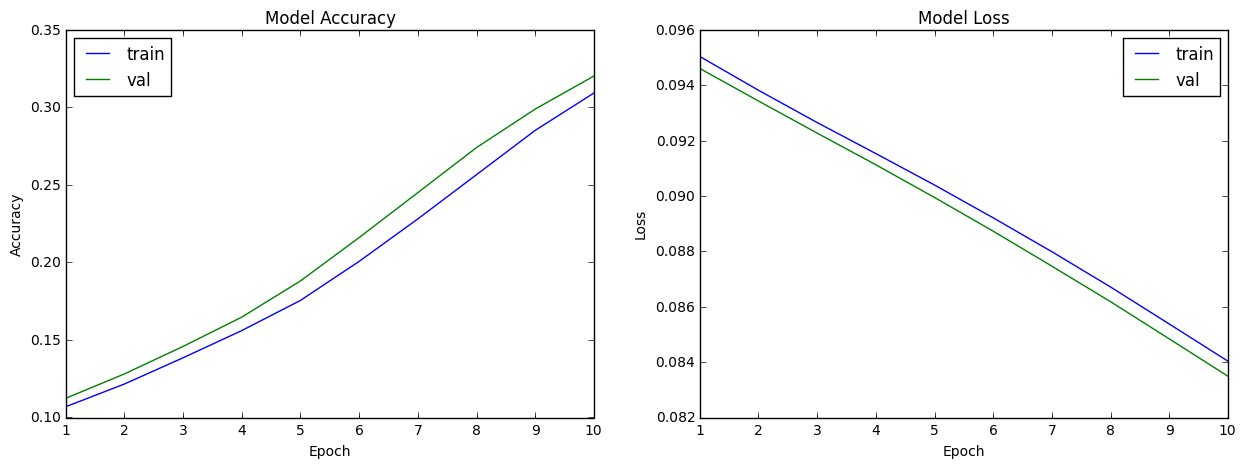

Model took 15.68 seconds to train
Accuracy on test data is: 33.26


In [13]:
# Decrease the learning rate
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# define optimizer, loss function
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

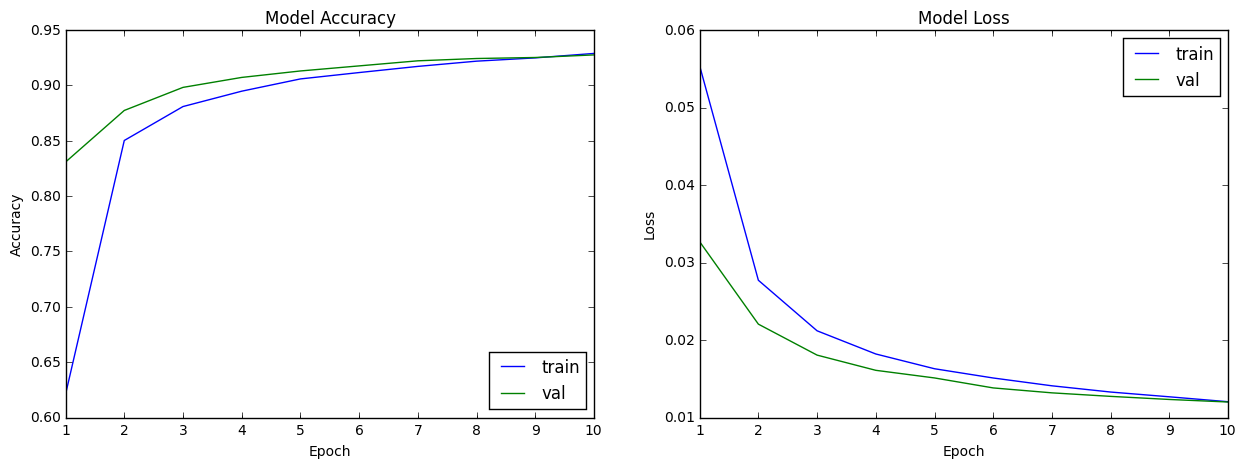

Model took 17.15 seconds to train
Accuracy on test data is: 92.79


In [14]:
# Increase the learning rate
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes),)
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# define optimizer, loss function
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
If the learning rate is decreased, less information is learned in each epoch and more epochs are required to learn a good model. If the learning rate is increased, more information is learned in each epoch and less epochs are required to learn a good model.

## Vary the Batch Size

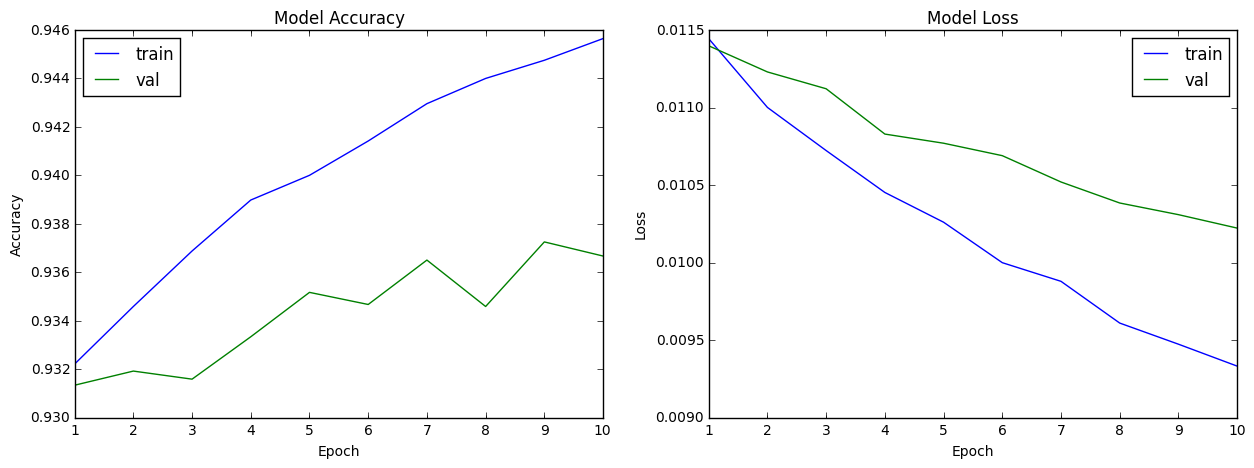

Model took 16.41 seconds to train
Accuracy on test data is: 93.52


In [15]:
# increase the batch size
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

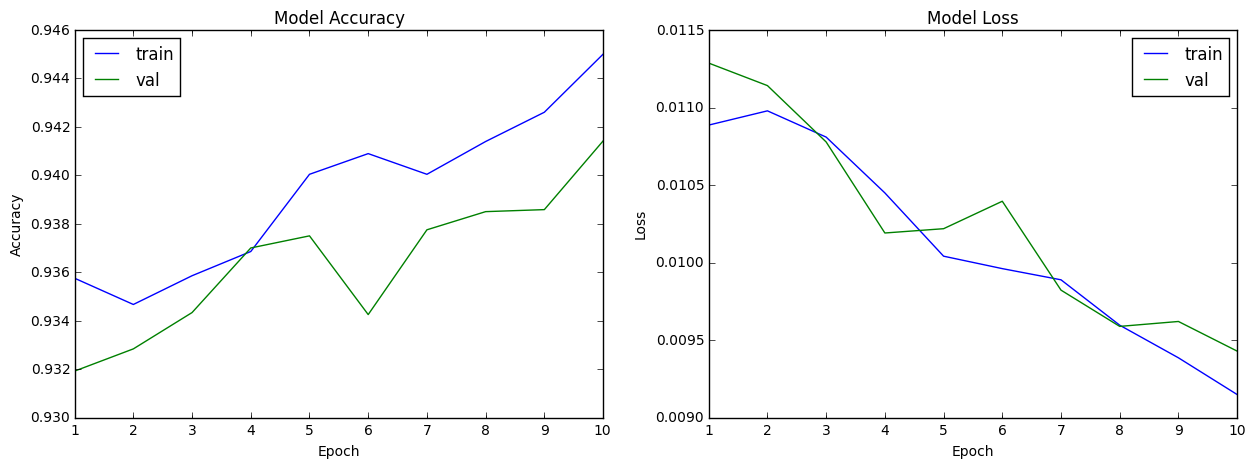

Model took 19.95 seconds to train
Accuracy on test data is: 94.43


In [16]:
# decrease the batch size
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=32, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
Increasing the batch size decreases the training time but reduces the rate of learning.

## Change the Cost Function to Categorical Crossentropy

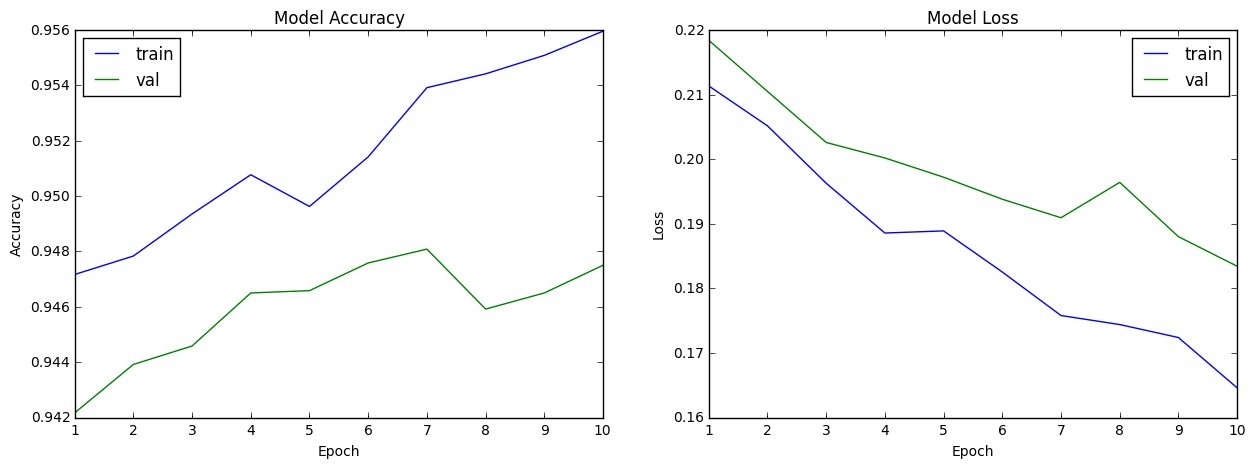

Model took 15.51 seconds to train
Accuracy on test data is: 94.97


In [17]:
# Change the cost function
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, nb_epoch=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation: 
Changing the cost function to categorical crossentropy significantly reduced the training time.

## Increase the Number of Epochs

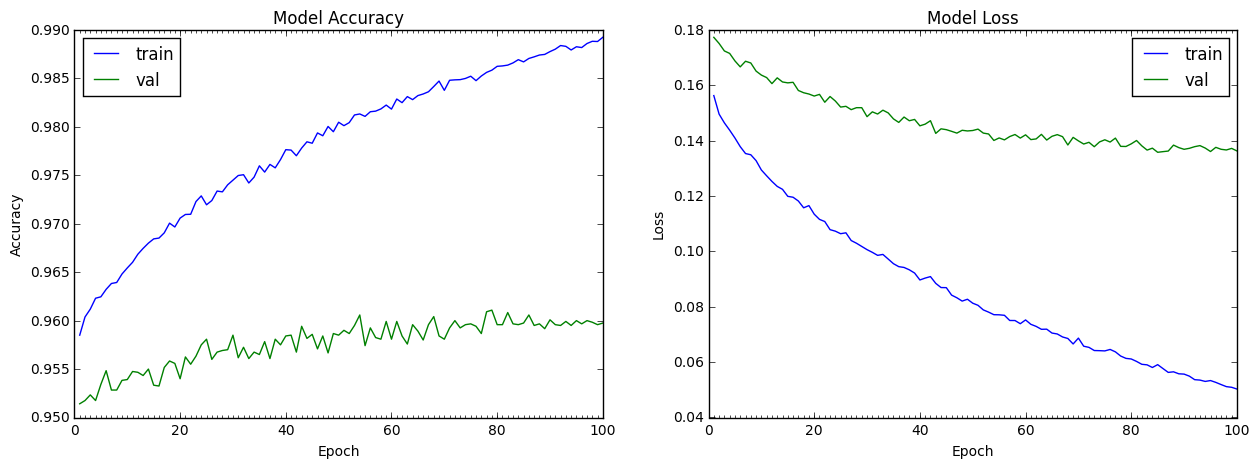

Model took 116.40 seconds to train
Accuracy on test data is: 96.14


In [18]:
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation:
As the number of epochs increase, more information is learned. The training as well as validation accuracy increases and then reaches a saturation.

## Deep Neural Network

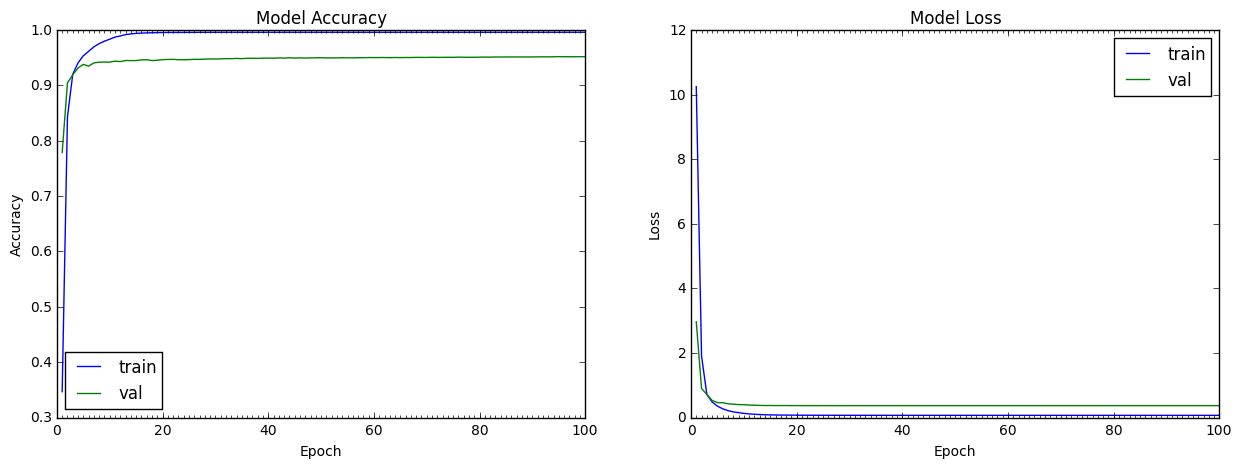

Model took 306.96 seconds to train
Accuracy on test data is: 95.12


In [19]:
# Define a deep neural network
model = Sequential()
model.add(Dense(512, input_dim=num_input_nodes))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# decrease the batch size
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, nb_epoch=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model)

## Observation: 
By adding more hidden layers, training time as well as information learned in each epoch increases. It helps to improve the performance for complex tasks but may not help significantly for relatively simple datasets such as MNIST.